In [22]:
from sqlalchemy import create_engine
from password import mykey
import pandas as pd
import matplotlib.pyplot as plt
engine = create_engine(f'postgresql://{mykey}@localhost:5432/sql_challenge')
connection = engine.connect()


In [23]:
salaries = pd.read_sql('SELECT * FROM salaries',connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


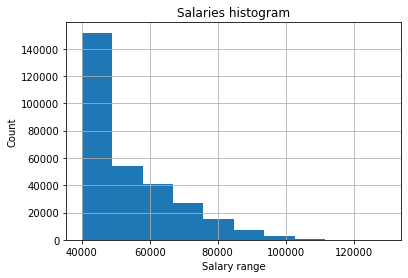

In [24]:
fig = salaries.hist()
plt.ylabel('Count')
plt.xlabel('Salary range')
plt.title('Salaries histogram')
plt.savefig('salaries_histogram.png')

In [25]:
employees = pd.read_sql('SELECT * FROM employees',connection)
titles = pd.read_sql('SELECT * FROM titles',connection)

merge_df = employees.merge(salaries,how='inner',on='emp_no')
merge_df.rename(columns={'emp_title_id':'title_id'},inplace=True)
merge_df =merge_df.merge(titles,how='inner',on='title_id')
plot_df = merge_df.groupby('title').mean('salary')
plot_df.head()

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704


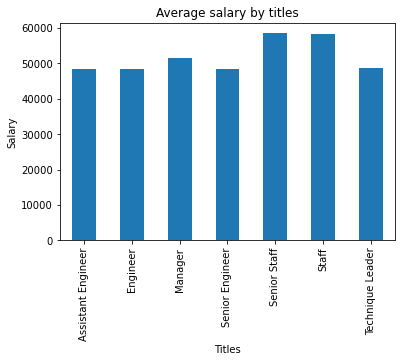

In [26]:
ax = plot_df.plot.bar(title = 'Average salary by titles')
plt.ylabel('Salary')
plt.xlabel('Titles')
ax.legend().set_visible(False)
plt.savefig('avg_salaries_by_titles.png')